# <span style='color:Green'> Ontario Green House Gas Emissions from 2010 to 2021 </span>

# <span style="color:Green"> 1. Load the dataset.</span>

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import io
import re
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# File path to the .xls file
file_path = 'GHG_Data_2010_2021_data_Oct2123.csv'

# Reading the .csv file
data = pd.read_csv(file_path)
# converting into dataframe
df = pd.DataFrame(data)

# <span style="color:Green">2. Display dataset columns and some info.</span>

In [23]:
print('The Info of data are: ')
print(df.info())

The Info of data are: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2948 entries, 0 to 2947
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   _id                                                2948 non-null   int64  
 1   Year                                               2948 non-null   int64  
 2   Ontario GHG ID                                     2948 non-null   int64  
 3   Facility Owner                                     2948 non-null   object 
 4   Facility Name                                      2948 non-null   object 
 5   Facility City                                      2947 non-null   object 
 6   Facility Primary NAICS Code                        2948 non-null   int64  
 7   Carbon dioxide (CO2) from non-biomass in CO2e (t)  2877 non-null   float64
 8   Carbon dioxide (CO2) from biomass in CO2e (t)      2053 non-null 

# <span style="color:Green"> 3. Summary of statistics for the numerical columns.</span>

In [24]:
df.describe()

,_id,Year,Ontario GHG ID,Facility Primary NAICS Code,Carbon dioxide (CO2) from non-biomass in CO2e (t),Carbon dioxide (CO2) from biomass in CO2e (t),Methane (CH4) in CO2e (t),Nitrous oxide (N2O) in CO2e (t),Sulphur hexafluoride (SF6) in CO2e (t),Hydrofluorocarbons (HFCs) in CO2e (t),Perfluorocarbons (PFCs) in CO2e (t),Nitrogen Trifluoride (NF3) in CO2e (t),Total CO2e from all sources in CO2e (t),Reporting Amount in CO2e (t),Verification Amount in CO2e (t)
count,2948.000000,2948.000000,2948.000000,2948.000000,2.877000e+03,2.053000e+03,2940.000000,2880.000000,1870.000000,1874.000000,1838.0,1110.0,2.948000e+03,2.948000e+03,2.799000e+03
mean,1474.500000,2016.696404,1177.462347,326255.387381,1.777535e+05,2.910837e+04,5173.572800,1211.209905,442.790239,18.210368,0.0,0.0,2.006316e+05,1.799461e+05,1.653039e+05
std,851.158622,3.318276,137.033993,139141.316543,5.216521e+05,1.417393e+05,29126.882380,3979.717718,4290.347798,410.897458,0.0,0.0,5.309092e+05,5.190897e+05,4.859424e+05
min,1.000000,2010.000000,1001.000000,111419.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,737.750000,2014.000000,1072.000000,221119.000000,1.421511e+04,0.000000e+00,7.769406,81.220000,0.000000,0.000000,0.0,0.0,1.688950e+04,1.560175e+04,1.321750e+04
50%,1474.500000,2017.000000,1142.000000,325110.000000,3.135300e+04,0.000000e+00,23.094750,195.989450,0.000000,0.000000,0.0,0.0,3.852800e+04,3.355800e+04,2.882400e+04
75%,2211.250000,2020.000000,1241.000000,331410.000000,9.352489e+04,0.000000e+00,270.463200,605.368301,0.000000,0.000000,0.0,0.0,1.233912e+05,9.915875e+04,8.643300e+04
max,2948.000000,2021.000000,1528.000000,911910.000000,8.538600e+06,1.346123e+06,428469.745000,79190.027000,64250.400000,17396.000000,0.0,0.0,8.593656e+06,8.593656e+06,5.243820e+06


# <span style="color:Green"> 4.Check null values in the dataset.</span>

In [25]:
missing_values = df.isnull().sum()
print(missing_values)

_id                                                     0
Year                                                    0
Ontario GHG ID                                          0
Facility Owner                                          0
Facility Name                                           0
Facility City                                           1
Facility Primary NAICS Code                             0
Carbon dioxide (CO2) from non-biomass in CO2e (t)      71
Carbon dioxide (CO2) from biomass in CO2e (t)         895
Methane (CH4) in CO2e (t)                               8
Nitrous oxide (N2O) in CO2e (t)                        68
Sulphur hexafluoride (SF6) in CO2e (t)               1078
Hydrofluorocarbons (HFCs) in CO2e (t)                1074
Perfluorocarbons (PFCs) in CO2e (t)                  1110
Nitrogen Trifluoride (NF3) in CO2e (t)               1838
Total CO2e from all sources in CO2e (t)                 0
Reporting Amount in CO2e (t)                            0
Verification A

# <span style="color:Green"> 5. Fill null values in the dataset.</span>

In [4]:
# Fill null values with NaN
df.fillna(np.nan, inplace=True)

In [7]:
df

,Year,Ontario GHG ID,Facility Owner,Facility Name,Facility City,Facility Primary NAICS Code,Carbon dioxide (CO2) from non-biomass in CO2e (t),Carbon dioxide (CO2) from biomass in CO2e (t),Methane (CH4) in CO2e (t),Nitrous oxide (N2O) in CO2e (t),Sulphur hexafluoride (SF6) in CO2e (t),Hydrofluorocarbons (HFCs) in CO2e (t),Perfluorocarbons (PFCs) in CO2e (t),Nitrogen Trifluoride (NF3) in CO2e (t),Total CO2e from all sources in CO2e (t),Reporting Amount in CO2e (t),Verification Amount in CO2e (t),Accredited Verification Body
0,2010,1001,ADM Agri-Industries,ADM Windsor,Windsor,311224,69652.000,0.0,29.000000,395.000000,0.0,0.0,0.0,NaN,70077,70077,NaN,NaN
1,2010,1002,Air Products Canada Ltd,Corunna Hydrogen Facility,Corunna,325120,389933.000,0.0,0.000000,0.000000,0.0,0.0,0.0,NaN,389933,389933,NaN,NaN
2,2010,1003,Algonquin Power Energy From Waste Inc.,Algonquin Power Energy from Waste Inc.,Brampton,562210,40378.000,44865.0,555.000000,1113.000000,0.0,0.0,0.0,NaN,86911,42046,NaN,NaN
3,2010,1005,ArcelorMittal Dofasco Inc.,Dofasco Hamilton,Hamilton,331110,4923106.000,0.0,24680.000000,8518.000000,0.0,0.0,0.0,NaN,4956304,4956304,NaN,NaN
4,2010,1006,Atlantic Packaging Products Ltd.,111 Progress,Scarborough,322130,42456.000,15218.0,18.000000,231.000000,0.0,0.0,0.0,NaN,57923,42705,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,2021,1523,Canada Royal Milk ULC,Canada Royal Milk ULC,Kingston,311515,13061.050,NaN,6.375925,67.680568,NaN,NaN,NaN,NaN,13136,13136,13136.0,NaN
2944,2021,1524,Kerry (Canada) Inc,Kerry Renfrew,Renfrew,325190,752.304,20051.5,29.587650,247.699388,NaN,NaN,NaN,NaN,21082,1030,1031.0,NaN
2945,2021,1525,Battenfeld Grease (Canada) Ltd.,BATTENFELD GREASE (CANADA) Ltd,Toronto,324190,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN
2946,2021,1527,IMT Standen's GP Inc.,IMT Integrated Facility,Kitchener,332113,9368.478,NaN,5.054500,49.259400,NaN,NaN,NaN,NaN,9423,9423,9423.0,NaN


# <span style="color:Green">6. How many years are recorded for this research? </span>

In [28]:
total_years = df['Year'].nunique()
years = df['Year'].unique()
print(r'Total years :',total_years)
print(years)

Total years : 12
[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]


# <span style="color:Green"> 7. Emission gases changes over the year</span>

In [29]:
# total emissions per year
yearly_totals = df.groupby('Year')['Total CO2e from all sources in CO2e (t)'].sum().reset_index()
print(yearly_totals)

    Year  Total CO2e from all sources in CO2e (t)
0   2010                                 59374943
1   2011                                 53237662
2   2012                                 53153567
3   2013                                 48242518
4   2014                                 45479318
5   2015                                 46093668
6   2016                                 47234771
7   2017                                 44237241
8   2018                                 47094289
9   2019                                 49771201
10  2020                                 46460662
11  2021                                 51082150



GHG Emissions by Gas Type Over Time (tonnes CO2e):
    Year  Carbon dioxide (CO2) from non-biomass in CO2e (t)  \
0   2010                                       5.383423e+07   
1   2011                                       4.704775e+07   
2   2012                                       4.828419e+07   
3   2013                                       4.286798e+07   
4   2014                                       4.039634e+07   
5   2015                                       4.064718e+07   
6   2016                                       4.061462e+07   
7   2017                                       3.726723e+07   
8   2018                                       4.039922e+07   
9   2019                                       4.050835e+07   
10  2020                                       3.805803e+07   
11  2021                                       4.147174e+07   

    Carbon dioxide (CO2) from biomass in CO2e (t)  Methane (CH4) in CO2e (t)  \
0                                    4.884425e+0

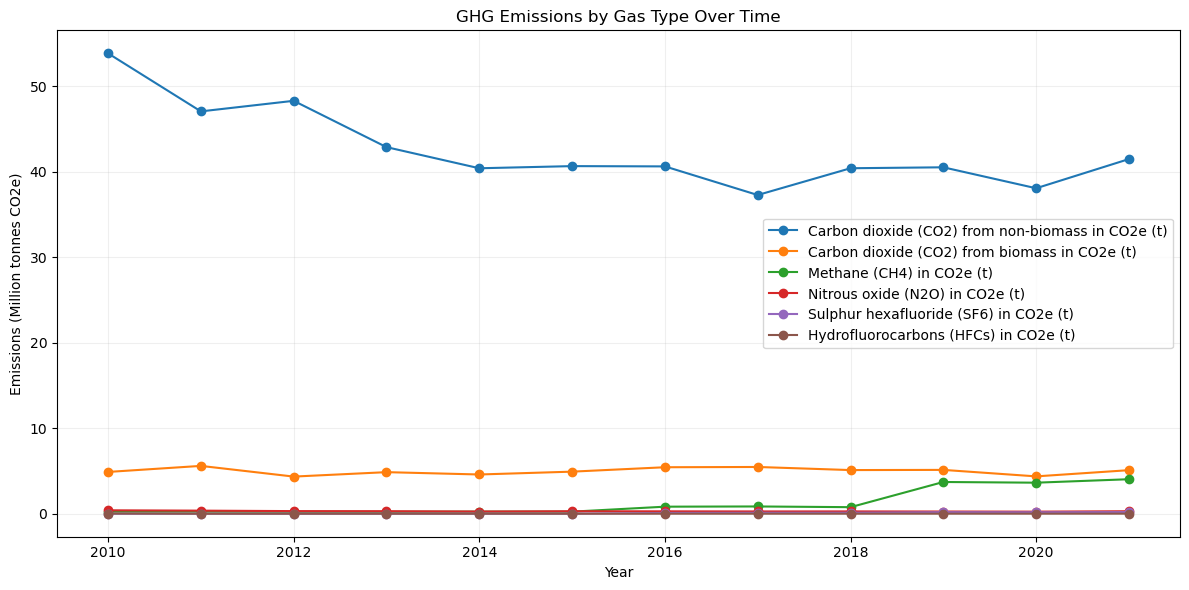

In [15]:
# emissions changes through years per each gas
def analyze_gas_trends(df):
    gases = [
        'Carbon dioxide (CO2) from non-biomass in CO2e (t)',
        'Carbon dioxide (CO2) from biomass in CO2e (t)',
        'Methane (CH4) in CO2e (t)',
        'Nitrous oxide (N2O) in CO2e (t)',
        'Sulphur hexafluoride (SF6) in CO2e (t)',
        'Hydrofluorocarbons (HFCs) in CO2e (t)',
        'Perfluorocarbons (PFCs) in CO2e (t)'
        ]
    # Group by year and sum each gas
    gas_trends =  round(df.groupby('Year')[gases].sum().reset_index(),4)

    # Plot the results
    plt.figure(figsize=(12, 6))
    
    # Plot each gas
    for gas in gases:
        if gas_trends[gas].sum() > 0:  # Only plot gases with non-zero values
            plt.plot(gas_trends['Year'], gas_trends[gas] / 1000000, marker='o', label=gas)
    
    plt.title('GHG Emissions by Gas Type Over Time')
    plt.xlabel('Year')
    plt.ylabel('Emissions (Million tonnes CO2e)')
    plt.legend()
    plt.grid(True, alpha=0.2)
    plt.tight_layout()
    
    return gas_trends

gas_trends = analyze_gas_trends(df)
print("\nGHG Emissions by Gas Type Over Time (tonnes CO2e):")
print(gas_trends)

# <span style="color:Green">8. What is the relative contribution of different GHGs (CO₂, CH₄, N₂O, etc.) to total emissions? Which greenhouse gas is the most dominant across all facilities? </span>

In [134]:
# Extract column names for GHGs excluding the total emissions column
ghg_columns = [col for col in data.columns[6:14]] 
#print(ghg_columns)
# Calculate relative contributions of each GHG to total emissions
relative_contributions = {}
for ghg in ghg_columns:
    relative_contributions[ghg] = data[ghg].sum() / data['Total CO2e from all sources in CO2e (t)'].sum() * 100  # Percentage

    
# Determine the most dominant GHG across all facilities
most_dominant_ghg = max(relative_contributions, key=relative_contributions.get)

# Print results
print("Relative Contribution of Each GHG (%):")
for ghg, contribution in relative_contributions.items():
    print(f"{ghg}: {contribution:.2f}%")

print(f"\nMost Dominant GHG: {most_dominant_ghg}")

Relative Contribution of Each GHG (%):
Carbon dioxide (CO2) from non-biomass in CO2e (t): 86.46%
Carbon dioxide (CO2) from biomass in CO2e (t): 10.10%
Methane (CH4) in CO2e (t): 2.57%
Nitrous oxide (N2O) in CO2e (t): 0.59%
Sulphur hexafluoride (SF6) in CO2e (t): 0.14%
Hydrofluorocarbons (HFCs) in CO2e (t): 0.01%
Perfluorocarbons (PFCs) in CO2e (t): 0.00%
Nitrogen Trifluoride (NF3) in CO2e (t): 0.00%

Most Dominant GHG: Carbon dioxide (CO2) from non-biomass in CO2e (t)


# <span style="color:Green"> 9.Visulization of each gas percentage to total GHG emissions </span>

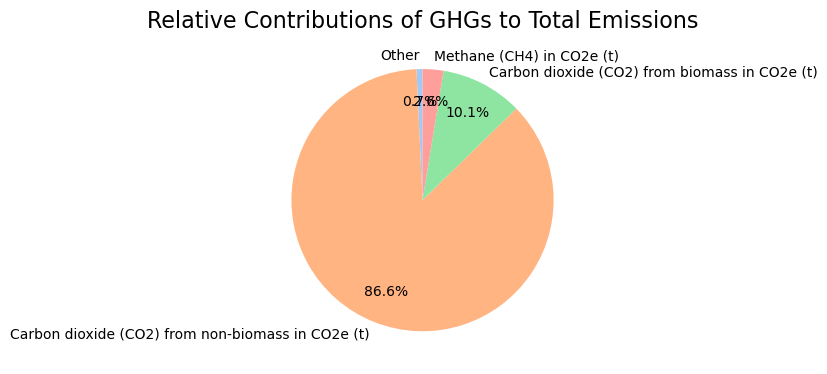

In [138]:
#P12
# Combine gases with contributions below 10% into "Other"
threshold = 2
aggregated_data = {"Other": 0}

for gas, value in relative_contributions.items():
    if value < threshold:
        aggregated_data["Other"] += value
    else:
        aggregated_data[gas] = value

# Prepare data for plotting
labels = list(aggregated_data.keys())
sizes = list(aggregated_data.values())


# Plot the pie chart
plt.figure(figsize=(7, 7))
# colors = sns.color_palette("pastel", len(labels))

# # Create pie chart without labels
# wedges, _, autotexts = plt.pie(
#     sizes,
#     labels=None,
#     autopct='%1.1f%%',
#     startangle=90,
#     colors=colors,
#     pctdistance=0.8,
#     textprops=dict(color="black")
# )

# # Add legend separately
# plt.legend(
#     wedges, labels,
#     title="GHG Sources",
#     loc="center left",
#     bbox_to_anchor=(1, 0.5),
#     fontsize=9,
# )
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel", len(labels)), #viridis
    pctdistance=0.75,
    textprops=dict(color="black")
)

# Add a title
plt.title("Relative Contributions of GHGs to Total Emissions", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

# <span style="color:Green"> 10. Which facilities produce the most greenhouse gases? </span>

In [31]:
max_emission_row = df.loc[df["Total CO2e from all sources in CO2e (t)"].idxmax(),["Facility Owner", "Facility Name", "Total CO2e from all sources in CO2e (t)"]]

print("The facilities produce the most greenhouse gases:")
print(f"Facility's owner: {max_emission_row['Facility Owner']}")
print(f"Facility's name: {max_emission_row['Facility Name']}")
print(f"Total produce: {max_emission_row['Total CO2e from all sources in CO2e (t)']} t CO2e")

The facilities produce the most greenhouse gases:
Facility's owner: Ontario Power Generation
Facility's name: Nanticoke Generating Station
Total produce: 8593656 t CO2e


In [45]:
# which sector cause the methane emissions to go up
# Filter data for years between 2018 and 2021
filtered_df = df[(df['Year'] >= 2018) & (df['Year'] <= 2021)]
top_sector_CH4 = filtered_df.groupby("Facility Primary NAICS Code")["Methane (CH4) in CO2e (t)"].sum()

# get the top10
top_sector_CH4 = top_sector_CH4.sort_values(ascending=False).head(10)

print("10 facility contribute the most to methane from 2018 to 2021:")
print(top_sector_CH4)

10 facility contribute the most to methane from 2018 to 2021:
Facility Primary NAICS Code
562210    8.444886e+06
221210    1.671118e+06
486210    1.069690e+06
331110    2.199544e+05
322112    1.273801e+05
221112    1.259117e+05
324110    1.182699e+05
562110    1.071968e+05
322121    9.525985e+04
322130    2.519654e+04
Name: Methane (CH4) in CO2e (t), dtype: float64


# <span style="color:Green"> 11.Which companies (facility owners) contribute the most to emissions? </span>

In [32]:
top_companies = df.groupby("Facility Owner")["Total CO2e from all sources in CO2e (t)"].sum()

# get the top10
top_companies = top_companies.sort_values(ascending=False).head(10)

print("10 facility owners contribute the most to emissions:")
print(top_companies)

10 facility owners contribute the most to emissions:
Facility Owner
Imperial Oil                     37945995
Stelco Inc.                      37914837
ArcelorMittal Dofasco Inc.       25546697
Essar Steel Algoma Inc.          20781568
Domtar Inc.                      19739183
ArcelorMittal Dofasco G.P.       19279341
Algoma Steel Inc.                16436029
St. Marys Cement Inc.            15322028
Ontario Power Generation Inc.    14532009
Ontario Power Generation         12811464
Name: Total CO2e from all sources in CO2e (t), dtype: int64


# <span style="color:Green"> 12.Are certain companies reducing or increasing their emissions over time? </span>

In [33]:
emission_trends = df.groupby(["Facility Owner", "Year"])["Total CO2e from all sources in CO2e (t)"].sum().reset_index()

emission_trends["Emission Change"] = emission_trends.groupby("Facility Owner")["Total CO2e from all sources in CO2e (t)"].diff()

# list the company accroding to the emission change
emission_change_summary = emission_trends.groupby("Facility Owner")["Emission Change"].sum().sort_values()

# find the first 10 and last 10
top_reducing_companies = emission_change_summary.head(10)
top_increasing_companies = emission_change_summary.tail(10)
top_increasing_companies = top_increasing_companies.sort_values(ascending=False)

print("The first 10 companies reducing emissions over time:")
print(top_reducing_companies)

print("\nThe first 10 companies increasing emissions over time:")
print(top_increasing_companies)

The first 10 companies reducing emissions over time:
Facility Owner
Ontario Power Generation Inc.      -4153261.0
U.S. Steel Canada Inc.             -4121953.0
TransAlta Generation Partnership   -1908054.0
Essar Power Canada Ltd.            -1441538.0
Northland Power Inc.               -1225500.0
Goreway Station Partnership         -685124.0
Cardinal Power of Canada, L.P.      -535221.0
Suncor Energy Products Inc.         -478270.0
NOVA Chemicals (Canada) Ltd.        -454737.0
Domtar Inc.                         -410271.0
Name: Emission Change, dtype: float64

The first 10 companies increasing emissions over time:
Facility Owner
Essar Steel Algoma Inc.           1369803.0
Portlands Energy Centre LP        1300120.0
Terrace Bay Pulp Inc.              796723.0
City of Toronto                    631426.0
Stelco Inc.                        527811.0
AV Terrace Bay Inc.                521833.0
St. Marys Cement Inc.              403093.0
TransCanada PipeLines Ltd.         364135.0
Imperial Oi

# <span style="color:Green">13. Which cities in Ontario have the highest emissions?</span>

Cities with the Highest Emissions:
Facility City
Hamilton            58713856
Sarnia              44033654
Sault Ste. Marie    43296524
Haldimand County    31964963
Corunna             28999867
Name: Total CO2e from all sources in CO2e (t), dtype: int64


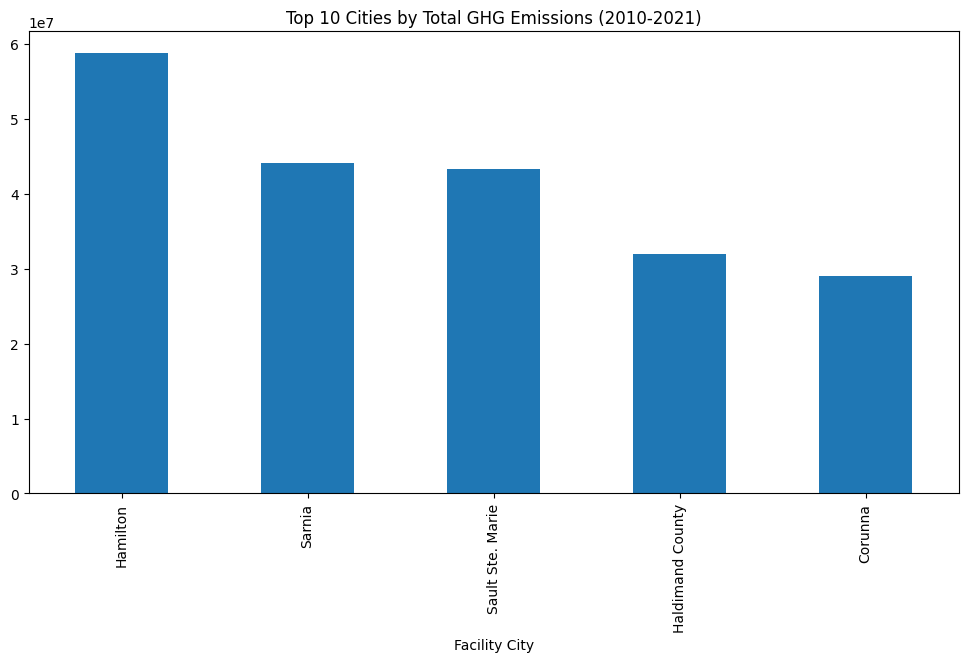

In [36]:
 # Group by city and calculate total emissions
city_emissions = data.groupby('Facility City')['Total CO2e from all sources in CO2e (t)'].sum().sort_values(ascending=False)

# Print cities with the highest emissions
print("Cities with the Highest Emissions:")
print(city_emissions.head())  

top_city = city_emissions.head(5)

plt.figure(figsize=(12, 6))
top_city.plot(kind='bar')
plt.title('Top 10 Cities by Total GHG Emissions (2010-2021)')
plt.show()

# <span style="color:Green"> 14.Has any city shown significant increase/decrease over the years?</span>

Top 5 Cities That Reduced Emissions the Most:
Facility City
Nanticoke      -8.531152
Courtright     -3.268980
Hamilton       -3.019738
Fort Frances   -1.078743
Windsor        -0.728851
Name: Emission Change, dtype: float64

Top 5 Cities That Increased Emissions the Most:
Facility City
Haldimand County    2.121158
North York          0.846308
Toronto             0.597580
Terrace Bay         0.546202
Blenheim            0.507950
Name: Emission Change, dtype: float64


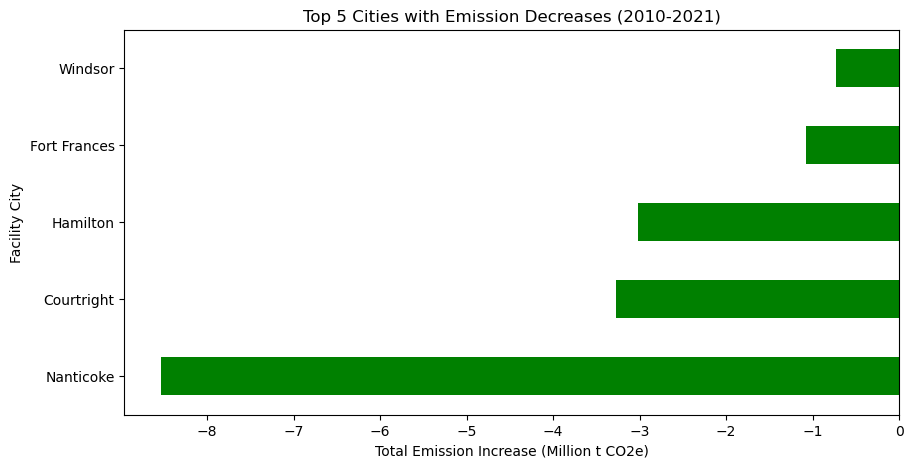

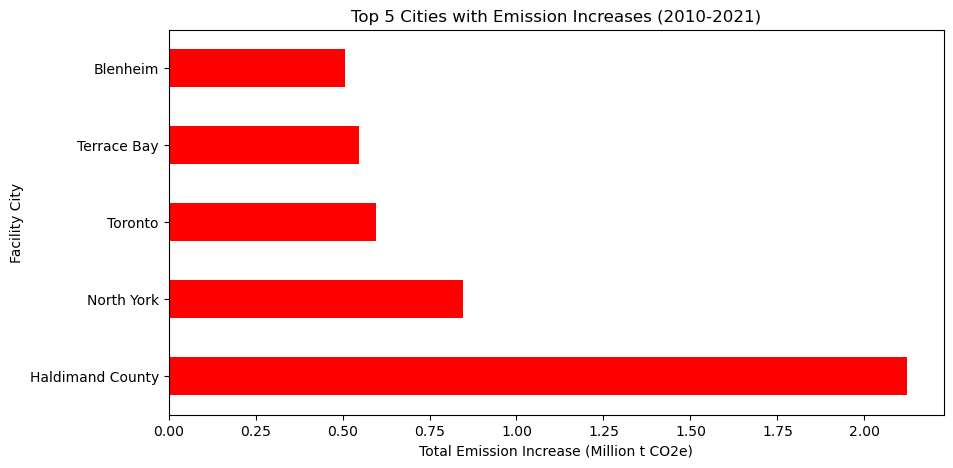

In [15]:
df["Facility City"] = df["Facility City"].str.strip().str.title()
#Remove duplicate

city_emission_trends = df.groupby(["Facility City", "Year"])["Total CO2e from all sources in CO2e (t)"].sum().reset_index()

city_emission_trends["Emission Change"] = city_emission_trends.groupby("Facility City")["Total CO2e from all sources in CO2e (t)"].diff()

city_emission_summary = city_emission_trends.groupby("Facility City")["Emission Change"].sum().sort_values()

top_reducing_cities = city_emission_summary.head(5) 

top_increasing_cities = city_emission_summary.tail(5).sort_values(ascending=False)
# changing unit to plot chart
top_reducing_cities /= 1_000_000 
top_increasing_cities /= 1_000_000


print("Top 5 Cities That Reduced Emissions the Most:")
print(top_reducing_cities)

print("\nTop 5 Cities That Increased Emissions the Most:")
print(top_increasing_cities)

plt.figure(figsize=(10, 5))
top_reducing_cities.plot(kind='barh', color='green')
plt.title('Top 5 Cities with Emission Decreases (2010-2021)')
plt.xlabel('Total Emission Increase (Million t CO2e)')
plt.ylabel('Facility City')
plt.show()

# Plot top increasing cities
plt.figure(figsize=(10, 5))
top_increasing_cities.plot(kind='barh', color='red')
plt.title('Top 5 Cities with Emission Increases (2010-2021)')
plt.xlabel('Total Emission Increase (Million t CO2e)')
plt.ylabel('Facility City')
plt.show()

# <span style="color:Green"> 15.Relationship between Total CO2e(t) from all sources and reporting amount in Co2e (t)?</span>

In [148]:

# Select relevant columns
reporting_column = "Reporting Amount in CO2e (t)"
total_column = "Total CO2e from all sources in CO2e (t)"

# Check for missing values and handle them
data = data[[reporting_column, total_column]].dropna()

# Calculate correlation
correlation = data[reporting_column].corr(data[total_column])
print(f"Correlation between {reporting_column} and {total_column}: {correlation:.2f}")


Correlation between Reporting Amount in CO2e (t) and Total CO2e from all sources in CO2e (t): 0.97


# <span style="color:Green"> 16. Any Difference between Reporting Amount in CO2e (t) and Verification Amount in CO2e (t) ?</span>

In [154]:
# Define relevant columns
reporting_column = "Reporting Amount in CO2e (t)"
verification_column = "Verification Amount in CO2e (t)"

# Convert columns to numeric and handle missing values
data[[reporting_column, verification_column]] = data[[reporting_column, verification_column]].apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=[reporting_column, verification_column])

# Calculate the difference
data['Difference'] = data[verification_column] - data[reporting_column]

# Identify and display rows where the difference is significant
difference_threshold = data['Difference'].std() * 2  # Example: 2 standard deviations
significant_differences = data[abs(data['Difference']) > difference_threshold]
# Select specific columns for display
selected_columns = [   
    verification_column,
    reporting_column,
    'Difference',
    'Year',
    'Facility Owner',
    'Facility Name',
    'Accredited Verification Body'
]
total_diff_count = len(significant_differences)
print(f"There are {total_diff_count} facilities with inconsistency between Reporting Amount in CO2e (t) and Verification  Amount in CO2e (t)")
print("\nRows with Significant Differences:")
print(significant_differences[selected_columns].head())

There are 63 facilities with inconsistency between Reporting Amount in CO2e (t) and Verification  Amount in CO2e (t)

Rows with Significant Differences:
      Verification Amount in CO2e (t)  Reporting Amount in CO2e (t)  \
1029                          29872.0                        286651   
1128                         166204.0                        517549   
1304                          37556.0                        236687   
1397                         516034.0                        749293   
1400                         235801.0                        445176   

      Difference  Year                  Facility Owner  \
1029   -256779.0  2016  Enbridge Gas Distribution Inc.   
1128   -351345.0  2016               Union Gas Limited   
1304   -199131.0  2017  Enbridge Gas Distribution Inc.   
1397   -233259.0  2017      TransCanada PipeLines Ltd.   
1400   -209375.0  2017               Union Gas Limited   

                                  Facility Name Accredited Verification

# <span style="color:Green"> 17. Which years have most missing data ?</span>


Yearly missing data：
Year
2021    2107
2020    2021
2019    2002
2010     447
2011     161
2012     152
2013     152
2014     148
2018     133
2017      39
2016      22
2015       8
Name: missing_count, dtype: int64


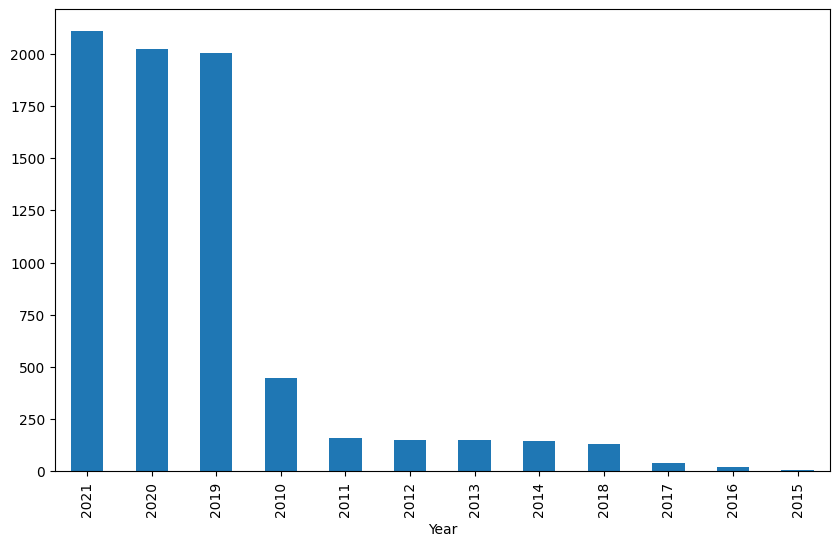

In [51]:
year_data = df[['Year']].copy()
year_data['missing_count'] = df.isnull().sum(axis=1)
missing_by_year = year_data.groupby('Year')['missing_count'].sum().sort_values(ascending=False)
print("\nYearly missing data：")
print(missing_by_year)

plt.figure(figsize=(10, 6))
missing_by_year.plot(kind='bar')
plt.show()

# <span style="color:Green"> 18. Which facilities or companies often submit incomplete reports ?</span>

Facility Owner
Regional Municipality of Niagara               163
City of Toronto                                114
Imperial Oil                                    90
Northland Power Inc.                            83
Atlantic Power LP                               74
Essex-Windsor Solid Waste Authority             63
Waste Management of Canada Corporation          62
3M Canada Company                               56
Hamilton Health Sciences Corporation            54
Public Works and Government Services Canada     54
Name: missing_count, dtype: int64


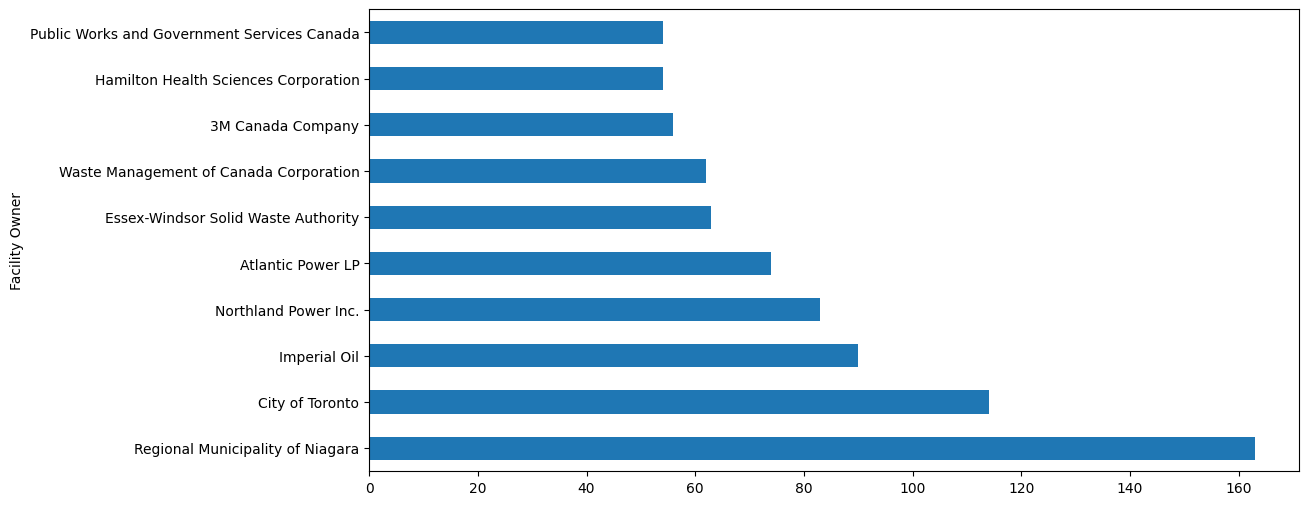

In [53]:
facility_columns = [col for col in df.columns if 'Facility' in col or 'Company' in col]
facility_name = facility_columns[0]

facility_data = df[[facility_name]].copy()
facility_data['missing_count'] = df.isnull().sum(axis=1)
missing_by_facility = facility_data.groupby(facility_name)['missing_count'].sum().sort_values(ascending=False).head(10)

print(missing_by_facility)

plt.figure(figsize=(12, 6))
missing_by_facility.plot(kind='barh')
plt.show()

# <span style="color:Green"> 19. Which NAICS industry sectors produce the most greenhouse gases ?</span>

Facility Primary NAICS Code
331110    144702678
221112    108026987
327310     55513926
324110     49791867
322112     36853527
325110     19266312
322121     16237974
562210     14542885
221119     14315729
327410     11386844
Name: Total CO2e from all sources in CO2e (t), dtype: int64


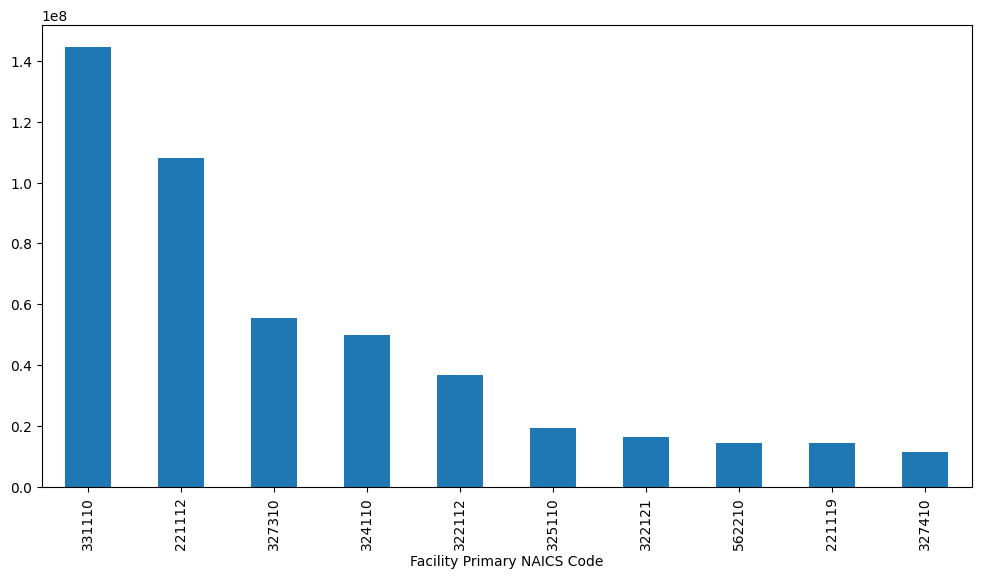

In [ ]:
naics_column = 'Facility Primary NAICS Code'
total_emission_column = 'Total CO2e from all sources in CO2e (t)'

naics_emissions = df.groupby(naics_column)[total_emission_column].sum()

naics_emissions_sorted = naics_emissions.sort_values(ascending=False).head(10)
print(naics_emissions_sorted)

plt.figure(figsize=(12, 6))
naics_emissions_sorted.plot(kind='bar')
plt.show()

# <span style="color:Green"> 20. Are there industries showing emission reduction over time ?</span>

Facility Primary NAICS Code
221112   -16735122.0
322121    -1446225.0
221119    -1282361.0
325110     -508191.0
336110     -172833.0
212232     -112946.0
212233      -44675.0
327410      -28014.0
622112      -26085.0
325313      -19612.0
dtype: float64


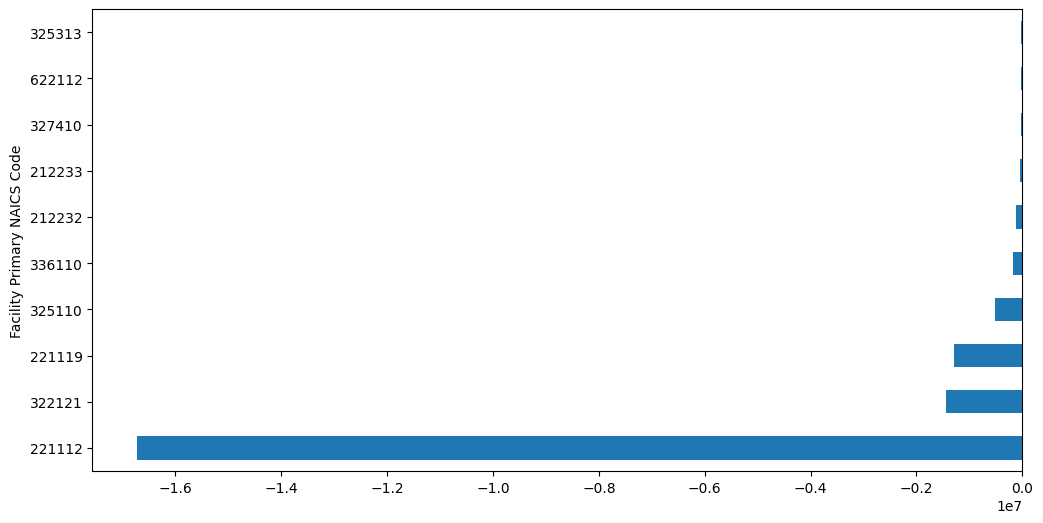

In [ ]:
naics_yearly_emissions = df.pivot_table(
    index=naics_column,
    columns='Year',
    values=total_emission_column,
    aggfunc='sum'
)

yearly_diff = naics_yearly_emissions[2021] - naics_yearly_emissions[2010]
naics_with_reduction = yearly_diff[yearly_diff < 0].sort_values()
print(naics_with_reduction.head(10))

plt.figure(figsize=(12, 6))
naics_with_reduction.head(10).plot(kind='barh')
plt.show()

# <span style="color:Green"> 21. Predict Overall Ontario Emissions</span>

In [106]:
ontario_emissions = df.groupby('Year')['Total CO2e from all sources in CO2e (t)'].sum().reset_index()

# Define features and target
X = ontario_emissions[['Year']]  # independent variable: Year
y = ontario_emissions['Total CO2e from all sources in CO2e (t)']  # dependent variable: Emissions

# Define future years you want to predict
future_years = pd.DataFrame({'Year': [2022, 2023, 2024, 2025, 2026, 2027]})

# Initialize three regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Train each model and make predictions on future years
predictions = {}
for name, model in models.items():
    model.fit(X, y)
    preds = model.predict(future_years)
    
    predictions[name] = preds

# Combine future years and predictions into one DataFrame for display
pred_df = future_years.copy()
for name, preds in predictions.items():
    pred_df[name] = preds

print("Predicted Ontario Emissions (Overall):")
print(pred_df)

Predicted Ontario Emissions (Overall):
   Year  Linear Regression  Decision Tree  Random Forest
0  2022       4.510176e+07     51082150.0    49286332.33
1  2023       4.445765e+07     51082150.0    49286332.33
2  2024       4.381353e+07     51082150.0    49286332.33
3  2025       4.316942e+07     51082150.0    49286332.33
4  2026       4.252530e+07     51082150.0    49286332.33
5  2027       4.188119e+07     51082150.0    49286332.33


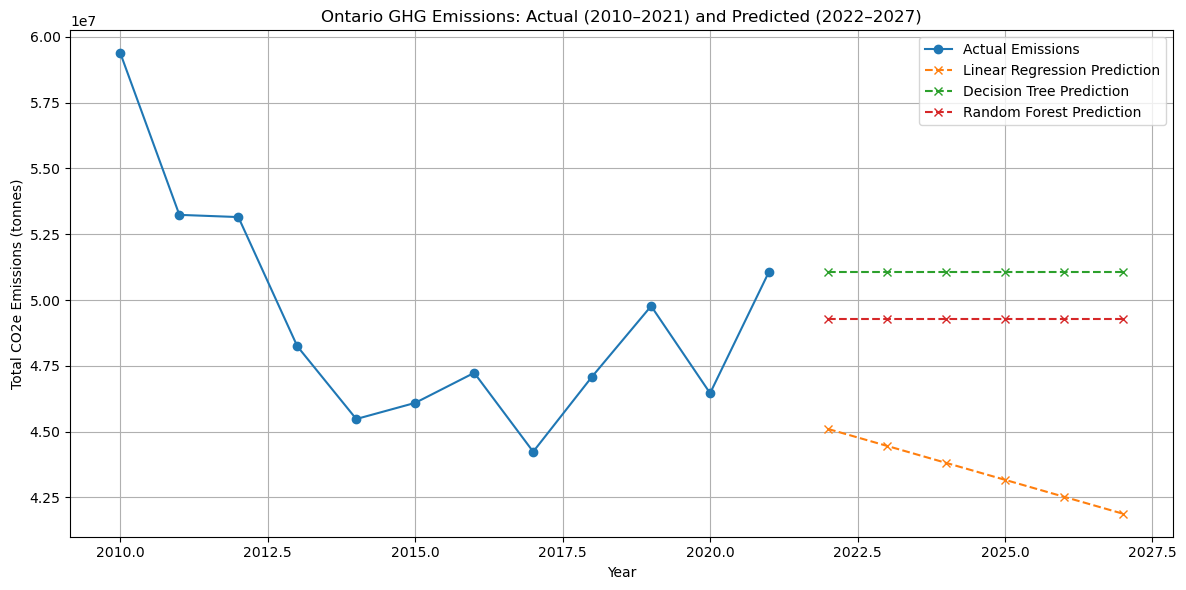

In [108]:
# Plot actual and predicted
plt.figure(figsize=(12, 6))
plt.plot(ontario_emissions['Year'], y, marker='o', label='Actual Emissions')

# Plot predictions for each model
for name in predictions:
    plt.plot(future_years['Year'], pred_df[name], marker='x', linestyle='--', label=f'{name} Prediction')

plt.title('Ontario GHG Emissions: Actual (2010–2021) and Predicted (2022–2027)')
plt.xlabel('Year')
plt.ylabel('Total CO2e Emissions (tonnes)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# <span style="color:Green"> 22. Predict Emissions for a Specific Facility Owner</span>

In [110]:
facility_data = df[df['Facility Owner'] == 'City of Toronto']
facility_emissions = facility_data.groupby('Year')['Total CO2e from all sources in CO2e (t)'].sum().reset_index()

# Check if there is sufficient data for the facility
X = facility_emissions[['Year']]
y = facility_emissions['Total CO2e from all sources in CO2e (t)']
    
predictions = {}
for name, model in models.items():
    model.fit(X, y)
    preds_f = model.predict(future_years)
    predictions[name] = preds_f
    
# Create DataFrame to show the predictions
pred_f_df = future_years.copy()
for name, preds in predictions.items():
    pred_f_df[name] = preds
    
print(f"\nPredicted Emissions for {'City of Toronto'}:")
print(pred_f_df)


Predicted Emissions for City of Toronto:
   Year  Linear Regression  Decision Tree  Random Forest
0  2022       9.141449e+05       708612.0      663735.02
1  2023       1.068734e+06       708612.0      663735.02
2  2024       1.223324e+06       708612.0      663735.02
3  2025       1.377914e+06       708612.0      663735.02
4  2026       1.532503e+06       708612.0      663735.02
5  2027       1.687093e+06       708612.0      663735.02


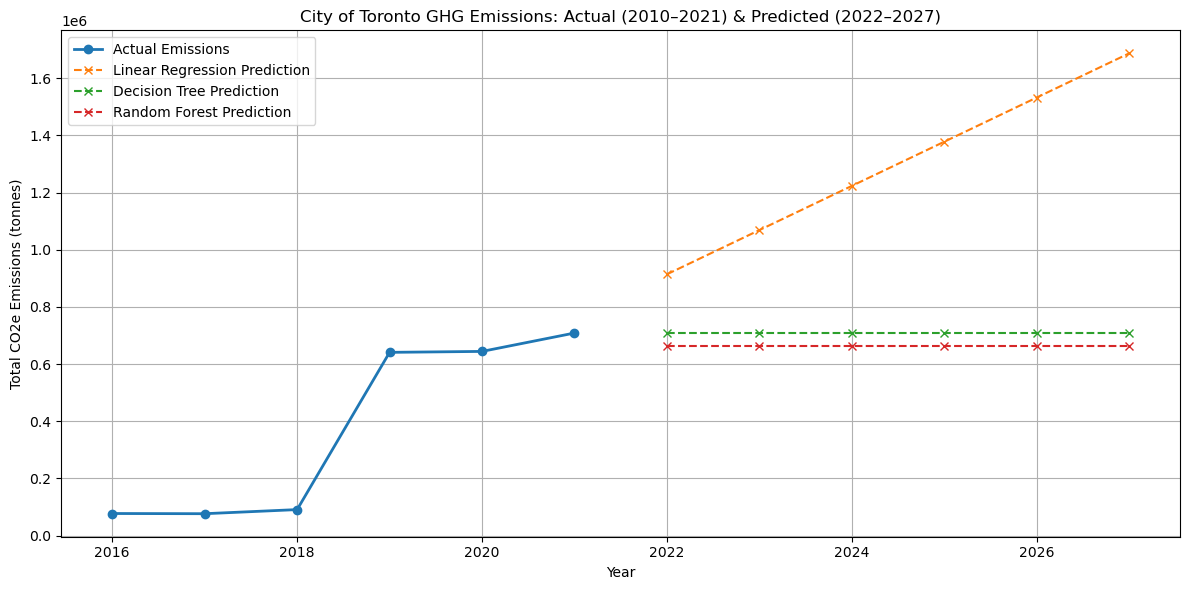

In [116]:
# Plot actual and predicted emissions
plt.figure(figsize=(12, 6))
plt.plot(facility_emissions['Year'], y, marker='o', label='Actual Emissions', linewidth=2)

# Plot predictions for each model
for name in predictions:
    plt.plot(future_years['Year'], pred_f_df[name], linestyle='--', marker='x', label=f'{name} Prediction')

plt.title('City of Toronto GHG Emissions: Actual (2010–2021) & Predicted (2022–2027)')
plt.xlabel('Year')
plt.ylabel('Total CO2e Emissions (tonnes)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# <span style="color:Green"> 23.Predict total emissions with total green house gases </span>

In [42]:
from sklearn.preprocessing import LabelEncoder
# print(df['Facility Primary NAICS Code'].nunique())
# Apply label encoding on Facility NAICS Code since unique codes have 111
encoder = LabelEncoder()
df['Facility Primary NAICS Code'] = encoder.fit_transform(df['Facility Primary NAICS Code']).astype(str)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

# setting features col list and target col list for training models
# select only gases with significant amount contribution
features = ['Year',
            'Facility Primary NAICS Code',
            'Carbon dioxide (CO2) from non-biomass in CO2e (t)','Carbon dioxide (CO2) from biomass in CO2e (t)', 
            'Methane (CH4) in CO2e (t)', 'Nitrous oxide (N2O) in CO2e (t)', 
           ]
target = 'Total CO2e from all sources in CO2e (t)'

df.fillna(0, inplace = True)
# Removing duplicate rows
df.drop_duplicates(inplace = True)

X = df[features]
y = df[target]

# Split data into training and testing sets with years
train_df = df[df["Year"].between(2010, 2018)] 
test_df = df[df["Year"].between(2019, 2021)]
X_train = train_df[features].copy()
X_test = test_df[features].copy()
y_train = train_df[target]
y_test = test_df[target]

# X_train = X_train.fillna(0)
# X_test = X_test.fillna(0)

#models to train and compare
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
}
predictions = {}

def evaluate_model(name,model):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test) # Predict emissions on test set
    predictions[name] = y_pred
    
    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{name}")
    print(f"Mean Squared Error: {mse:,.2f}")
    print(f"MAE: {mae:,.2f} tons CO2e")  # Absolute error
    print(f"R² Score: {r2:.3f}\n")  # Closer to 1 = better
    return model
    
# Evaluate each model
trained_pipelines = {}
for name, model in models.items():
    trained_pipelines[name] = evaluate_model(name, model)

# check the model with one sample facility
sample_facility = X_test.iloc[[0]]  # Example facility data
actual_emission = y_test.iloc[0]

print(f"\nActual Emission for Sample Facility:   {actual_emission:,.2f} tons CO2e")

for name, model in models.items():
    # predicted_emission = model.predict(sample_facility.values.reshape(1, -1))[0]  #predict using trained model on sample data
    predicted_emission = model.predict(sample_facility)[0]
    print(f"Predicted Emission for Sample Facility by {name}:{predicted_emission:,.2f} tons CO2e")


Linear Regression
Mean Squared Error: 21,896,122.69
MAE: 2,194.41 tons CO2e
R² Score: 1.000


Decision Tree Regressor
Mean Squared Error: 15,154,172,148.65
MAE: 15,473.40 tons CO2e
R² Score: 0.906


Random Forest Regressor
Mean Squared Error: 1,419,245,046.94
MAE: 11,445.02 tons CO2e
R² Score: 0.991


Actual Emission for Sample Facility:   73,169.00 tons CO2e
Predicted Emission for Sample Facility by Linear Regression:74,717.27 tons CO2e
Predicted Emission for Sample Facility by Decision Tree Regressor:73,021.00 tons CO2e
Predicted Emission for Sample Facility by Random Forest Regressor:72,963.43 tons CO2e


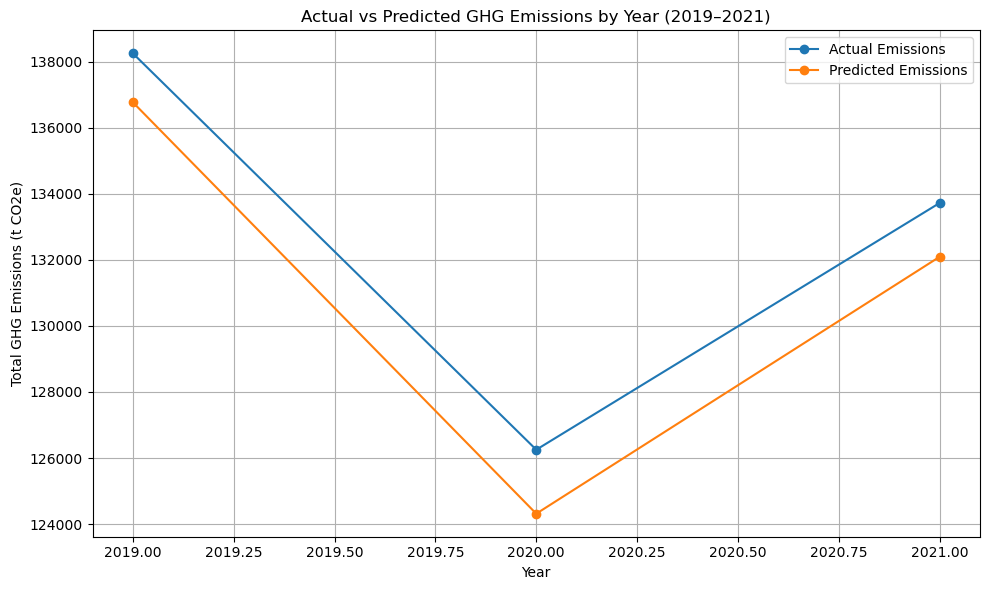

In [96]:
# Visualization 
y_pred = predictions['Random Forest Regressor'] #above result,this model is the best so use this to visualze
# Create a DataFrame to compare actual vs predicted with year
result_df = test_df[['Year']].copy()
result_df['Actual'] = y_test.values
result_df['Predicted'] = y_pred

# Group by year to get average or total emissions 
# summary_df = result_df.groupby('Year')[['Actual', 'Predicted']].sum().reset_index()
summary_df = result_df.groupby('Year')[['Actual', 'Predicted']].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(summary_df['Year'], summary_df['Actual'], marker='o', label='Actual Emissions')
plt.plot(summary_df['Year'], summary_df['Predicted'], marker='o', label='Predicted Emissions')
plt.title("Actual vs Predicted GHG Emissions by Year (2019–2021)")
plt.xlabel("Year")
plt.ylabel("Total GHG Emissions (t CO2e)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

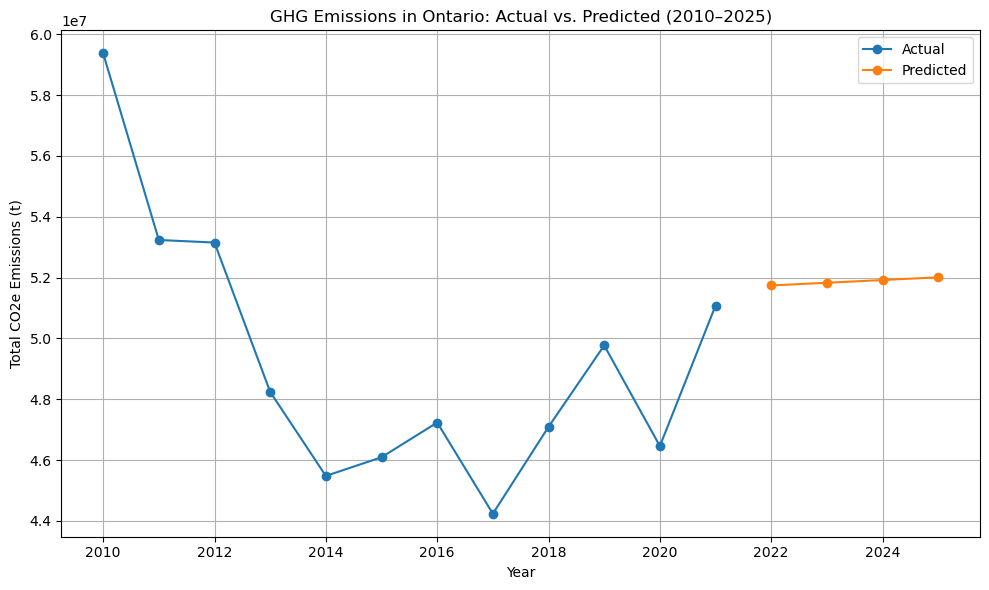

In [104]:
# define a future DataFrame for 2022–2025
future_years = [2022, 2023, 2024, 2025]

# Use average GHG values by NAICS code for the last few years (2018–2021)
base_years_data = df[df["Year"].isin([2018, 2019, 2020,2021])].copy()

base_years_data.drop(columns=['Total CO2e from all sources in CO2e (t)'], inplace=True) #drop this total to predict
# Duplicate rows for each future year
future_data = pd.concat([base_year_data.assign(Year=year) for year in future_years], ignore_index=True)

# Ensure feature order matches model input
X_future = future_data[features]

# Predict emissions with future data
future_data['Predicted CO2e'] = models['Linear Regression'].predict(X_future)

# Combine actual (2010–2021) and predicted (2022–2025) totals
# Group by year to sum emissions
actual_summary = df.groupby("Year")['Total CO2e from all sources in CO2e (t)'].sum().reset_index()
predicted_summary = future_data.groupby("Year")['Predicted CO2e'].sum().reset_index()

# Rename columns 
actual_summary.columns = ["Year", "Total Emissions"]
predicted_summary.columns = ["Year", "Total Emissions"]

# actual vs. predicted
actual_summary["Type"] = "Actual"
predicted_summary["Type"] = "Predicted"

# Combine both
full_summary = pd.concat([actual_summary, predicted_summary])

#Plot actual vs predicted
plt.figure(figsize=(10, 6))
for label, group in full_summary.groupby("Type"):
    plt.plot(group["Year"], group["Total Emissions"], marker='o', label=label)

plt.title("GHG Emissions in Ontario: Actual vs. Predicted (2010–2025)")
plt.xlabel("Year")
plt.ylabel("Total CO2e Emissions (t)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


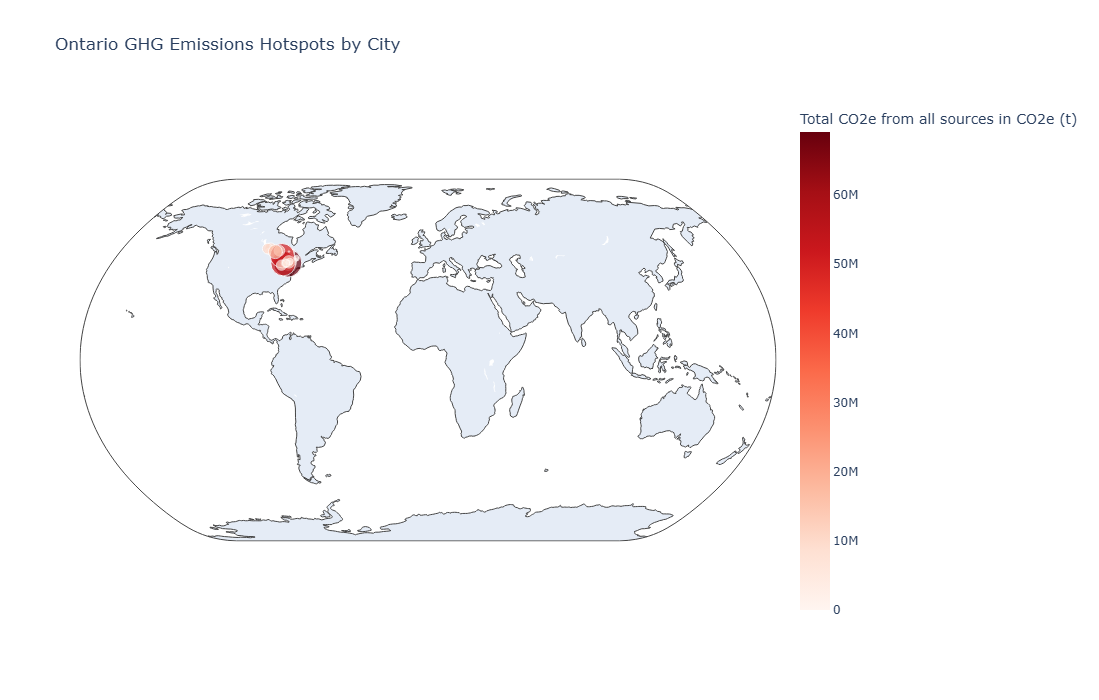

In [183]:
import plotly.express as px #for using map

# Load datasets
df_cities = pd.read_csv("canadacities.csv")

# Filter for Ontario cities
df_ontario = df_cities[df_cities['province_name'] == 'Ontario'].copy()

# Prepare and clean GHG data
df_emissions = df[['Facility City', 'Total CO2e from all sources in CO2e (t)']].dropna()
df_emissions = df_emissions[df_emissions['Facility City'].str.strip() != '']
df_emissions = df_emissions.groupby('Facility City', as_index=False).sum()
df_emissions.rename(columns={'Facility City': 'city'}, inplace=True)

# Normalize for matching
df_emissions['city'] = df_emissions['city'].str.strip().str.lower()
df_ontario['city'] = df_ontario['city'].str.strip().str.lower()

# Merge to get coordinates
df_merged = pd.merge(df_emissions, df_ontario, on='city', how='inner')
df_plot = df_merged.groupby(['city', 'lat', 'lng'], as_index=False)['Total CO2e from all sources in CO2e (t)'].sum()

# Plot
fig = px.scatter_geo(df_plot,
                     lat='lat',
                     lon='lng',
                     hover_name='city',
                     size='Total CO2e from all sources in CO2e (t)',
                     color='Total CO2e from all sources in CO2e (t)',
                     color_continuous_scale='Reds',
                     projection='natural earth',
                     title='Ontario GHG Emissions Hotspots by City',
                     width=1000,
                     height=700)

fig.show()


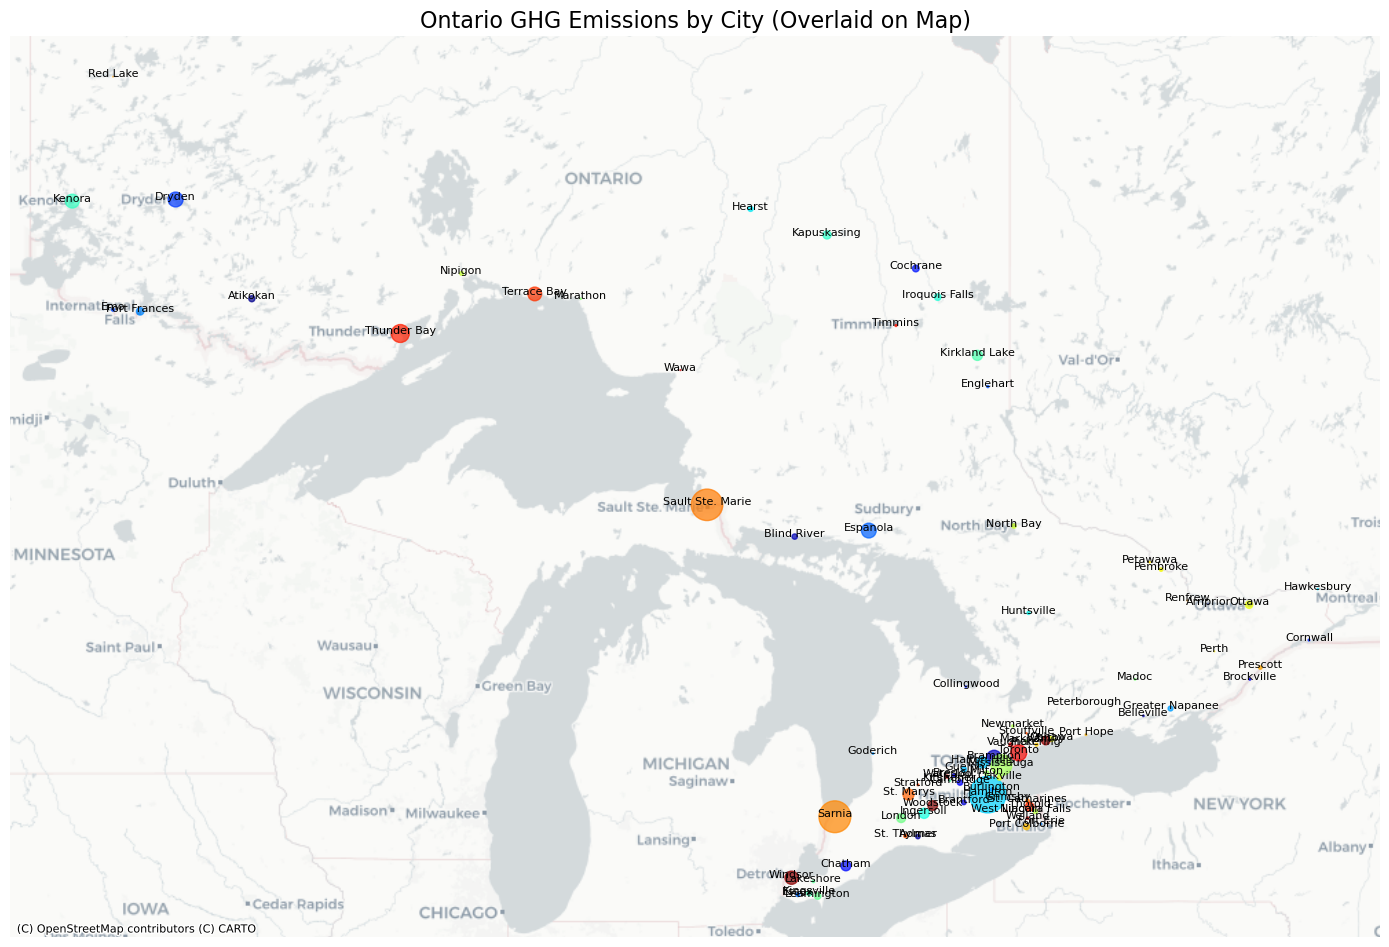

In [185]:
# create on world map with plot design
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(df_plot['lng'], df_plot['lat'])]
gdf = gpd.GeoDataFrame(df_plot, geometry=geometry, crs="EPSG:4326")
gdf = gdf.to_crs(epsg=3857)  # Web Mercator for contextily

# Plot
fig, ax = plt.subplots(figsize=(14, 10))

gdf.plot(ax=ax,
         markersize=gdf['Total CO2e from all sources in CO2e (t)'] / 100000,
         c=gdf['Total CO2e from all sources in CO2e (t)'],
         cmap='jet',
         legend=True,
         alpha=0.7)

# Add city labels
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['city']):
    ax.text(x, y, label.title(), fontsize=8, ha='center', color='black')

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_title("Ontario GHG Emissions by City (Overlaid on Map)", fontsize=16)
ax.set_axis_off()

plt.tight_layout()
plt.show()
